# Some imports and helper code

In [394]:
import os
import pickle
import seaborn
import numpy as np
import pandas as pd
import scipy as sci
import networkx as nx
import numpy.linalg as LIN
import matplotlib.pylab as plt
np.random.seed(1)

%matplotlib inline 
%load_ext autoreload

plt.style.use('seaborn-paper')
seaborn.set_context('paper', font_scale=2.2)
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.weight'] = 'medium'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def plot_results(results, alphas):
    plt.figure()
    results[['lambda', 'lambda_sub', 'centrality']].plot(kind='line')
    plt.xlabel('iterations')
    title_template = r'$\alpha_1={:.2f}, \alpha_2={:.2f}, \alpha_3={:.2f}$'
    plt.title(title_template.format(*alphas))
    
    
def plot_adj_matrices(A, attacked_A):
    _, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(A, cmap='hot')
    axes[0].set_title('before attack')
    axes[1].imshow(attacked_A, cmap='hot')
    axes[1].set_title('after attack')

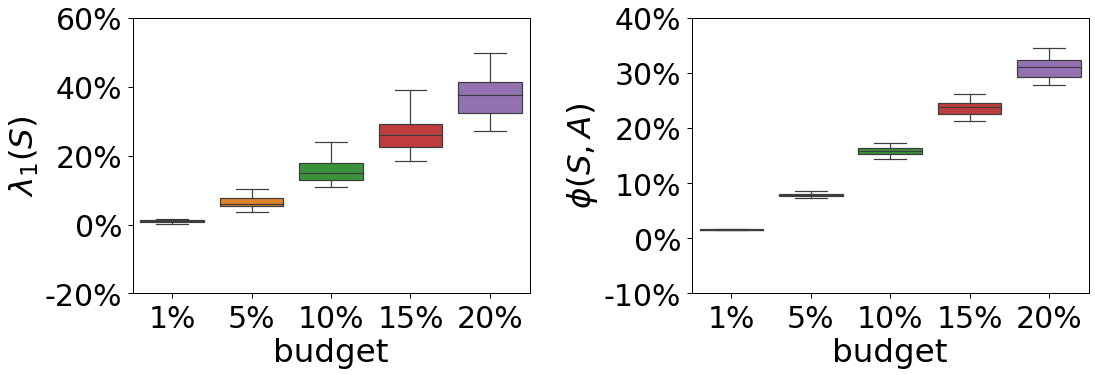

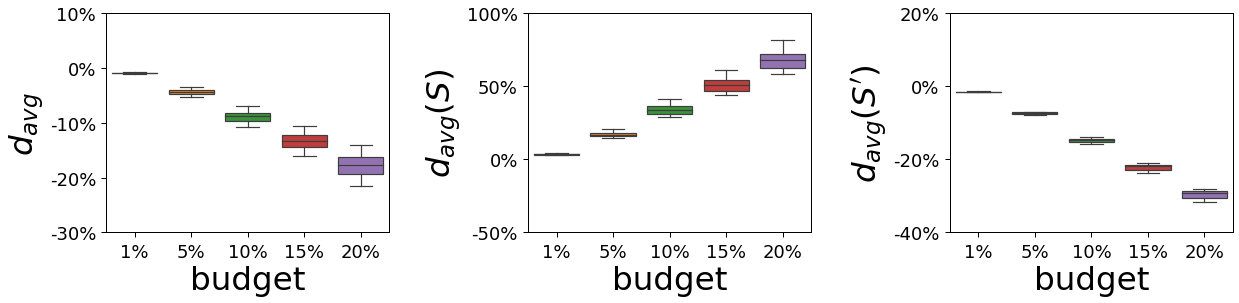

In [86]:
graph_type = 'BTER'
with open('../result/{}_numExp_15.p'.format(graph_type), 'rb') as fid:
    data = pickle.load(fid)

data_f = []
for budget in data.keys():
    for item in data[budget]:
        data_f.append([item[1], item[2], item[5], item[6], item[7], item[8], budget])
data_f = pd.DataFrame(data_f, columns=['lambda1_S', 'centrality', \
                                       'avgDegree', 'avgDegree_S', 'avgDegree_S_prime', 'avgNormDiff', 'budget'], dtype=np.float32)        
data_f = data_f.dropna()

seaborn.set_context('paper', font_scale=3.4)
f, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = seaborn.boxplot(x='budget', y='lambda1_S', data=data_f, orient='v', showfliers=False, ax=axes[0])
plt.sca(ax)
plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'])
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.ylabel('$\lambda_1(S)$')
plt.xlabel('budget')
plt.tight_layout()

ax = seaborn.boxplot(x='budget', y='centrality', data=data_f, orient='v', showfliers=False, ax=axes[1])
plt.sca(ax)
plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'])
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.ylabel('$\phi(S, A)$')
plt.tight_layout()
# plt.title("% of increases cut(S) - {}".format(graph_type))
# plt.savefig('../result/figure/{}_cut_numExp_15.pdf'.format(graph_type))



################################################################################

seaborn.set_context('paper', font_scale=3.4)
f, axes = plt.subplots(1, 3, figsize=(18, 5))
xtick_fontSize = 18
ytick_fontSize = 18


ax = seaborn.boxplot(x='budget', y='avgDegree', data=data_f, orient='v', showfliers=False, ax=axes[0])
plt.sca(ax)
plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'], fontsize=xtick_fontSize)
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()], fontsize=ytick_fontSize)
plt.ylabel('$d_{avg}$')
plt.xlabel('budget')
plt.tight_layout()

ax = seaborn.boxplot(x='budget', y='avgDegree_S', data=data_f, orient='v', showfliers=False, ax=axes[1])
plt.sca(ax)
plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'], fontsize=xtick_fontSize)
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()], fontsize=ytick_fontSize)
plt.ylabel('$d_{avg}(S)$')
plt.tight_layout()

ax = seaborn.boxplot(x='budget', y='avgDegree_S_prime', data=data_f, orient='v', showfliers=False, ax=axes[2])
plt.sca(ax)
plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'], fontsize=xtick_fontSize)
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()], fontsize=ytick_fontSize)
plt.ylabel('$d_{avg}(S\')$')
plt.tight_layout()
# plt.title("% of increases cut(S) - {}".format(graph_type))
# plt.savefig('../result/figure/{}_cut_numExp_15.pdf'.format(graph_type))

################################################################################

# seaborn.set_context('paper', font_scale=3.4)
# f, ax = plt.subplots(1, 1, figsize=(6, 5))
# xtick_fontSize = 18
# ytick_fontSize = 18

# ax = seaborn.boxplot(x='budget', y='avgNormDiff', data=data_f, orient='v', showfliers=False, ax=ax)
# plt.sca(ax)
# plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'], fontsize=xtick_fontSize)
# plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()], fontsize=ytick_fontSize)
# plt.ylabel('$d_{avg}$')
# plt.xlabel('budget')
# plt.tight_layout()

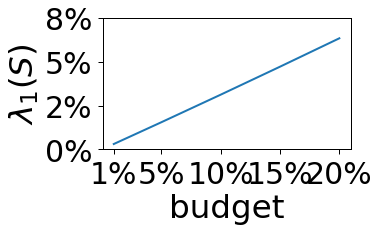

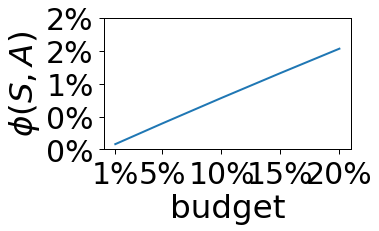

In [10]:
graph_type = 'Email'
cc = 50
with open('../result/{}_numExp_1_cc={}.p'.format(graph_type, cc), 'rb') as fid:
    data = pickle.load(fid)
    
data_f = []
for budget in data.keys():
    for item in data[budget]:
        data_f.append([item[1], item[2], budget])
data_f = pd.DataFrame(data_f, columns=['lambda1_S', 'centrality', 'budget'], dtype=np.float32)        
data_f = data_f.dropna()

plt.figure()
plt.plot(data_f['budget'], data_f['lambda1_S'], linewidth=2)
ax = plt.gca()
plt.xticks([0.01, 0.05, 0.1, 0.15, 0.2], ['1%', '5%', '10%', '15%', '20%'])
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.ylabel('$\lambda_1(S)$')
plt.xlabel('budget')
plt.tight_layout()
# plt.savefig('../result/figure/{}_lambda1S_cc={}.pdf'.format(graph_type, cc))

plt.figure()
plt.plot(data_f['budget'], data_f['centrality'],linewidth=2)
ax = plt.gca()
plt.xticks([0.01, 0.05, 0.1, 0.15, 0.2], ['1%', '5%', '10%', '15%', '20%'])
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.ylabel('$\phi(S, A)$')
plt.xlabel('budget')
plt.tight_layout()
# plt.savefig('../result/figure/{}_cut_cc={}.pdf'.format(graph_type, cc))

### Simulation results of epidemic spreading

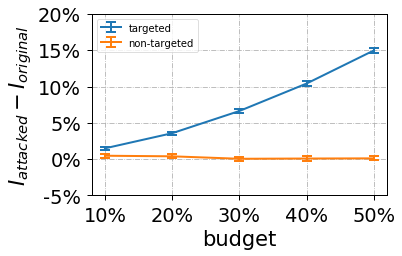

In [468]:
graph_type = 'Stoc-Block'
numExp = 30
mode = 'min_eigcent_SP'
GAMMA = 0.24
TAU = 0.06


with open('../result/unweighted/{}/{}-SIS-newcomm/Gamma-{:.2}---Tau-{:.2}/{}_numExp_{}_SIS_equalAlpha.p'.format(\
                                                mode, graph_type, GAMMA, TAU, graph_type, numExp), 'rb') as fid:
    data = pickle.load(fid)
data = data[~(data['ratio targets'].isin([0]) & data['ratio bystanders'].isin([0]))]
data = data.dropna()


SP_err = []
Key = 'ratio bystanders'
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    SP_err.append((a-b).sem() * 1.96)
    
S_err = []
Key = 'ratio targets'
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    S_err.append((a-b).sem() * 1.96)
    
    
S_attacked = data.pivot_table(index=['graph', 'budget'])['ratio targets']['attacked']
S_original = data.pivot_table(index=['graph', 'budget'])['ratio targets']['original']

SP_attacked = data.pivot_table(index=['graph', 'budget'])['ratio bystanders']['attacked']
SP_original = data.pivot_table(index=['graph', 'budget'])['ratio bystanders']['original']

S_diff  = S_attacked - S_original
SP_diff = SP_attacked - SP_original

x = [0.1, 0.2, 0.3, 0.4, 0.5]
plt.errorbar(x, S_diff, yerr=S_err, label='targeted', linewidth=2, markersize=7, capsize=5, elinewidth=2, markeredgewidth=2)
plt.errorbar(x, SP_diff, yerr=SP_err, label='non-targeted', linewidth=2, markersize=7, capsize=5, elinewidth=2, markeredgewidth=2)
plt.xticks(x, ['10%', '20%', '30%', '40%', '50%'])
ax = plt.gca()
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.xlabel('budget')
plt.ylabel('$I_{attacked} - I_{original}$')
plt.legend(fontsize=10, loc='upper left')
plt.grid(linestyle='-.')
plt.tight_layout()
# plt.savefig('../result/1.pdf'.format(graph_type, graph_type, numExp))

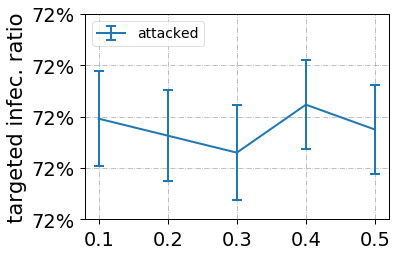

In [903]:
x = [0.1, 0.2, 0.3, 0.4, 0.5]
Key = 'ratio bystanders'
with open('../result/unweighted/min_lambda1_SP/{}-SIS/Gamma-0.24---Tau-0.06/{}_numExp_{}_SIS_alpha1=1.p'.format(graph_type, graph_type, numExp), 'rb') as fid:
    data = pickle.load(fid)

data = data[~(data['ratio targets'].isin([0]) & data['ratio bystanders'].isin([0]))]

S_attacked = data.pivot_table(index=['graph', 'budget'])[Key]['attacked']
S_original = data.pivot_table(index=['graph', 'budget'])[Key]['original']

Err_attacked = data.pivot_table(index=['graph', 'budget'], aggfunc='sem')[Key]['attacked'] * 1.96
# Err_original = data.pivot_table(index=['graph', 'budget'], aggfunc='sem')[Key]['original'] * 1.96

plt.errorbar(x, S_attacked, yerr=Err_attacked, label='attacked', linewidth=2, markersize=7, capsize=5, elinewidth=2, markeredgewidth=2)
# axs[idx].errorbar(x, S_original, yerr=Err_original, label='original', linewidth=2, markersize=7, capsize=5, elinewidth=2, markeredgewidth=2)
ax = plt.gca()
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.ylabel('targeted infec. ratio')
plt.legend(fontsize=14, loc='upper left')
plt.grid(linestyle='-.')
plt.tight_layout()
# plt.savefig('../result/{}-SIS/{}_numExp_{}_SIS_seedLoc.pdf'.format(graph_type, graph_type, numExp))

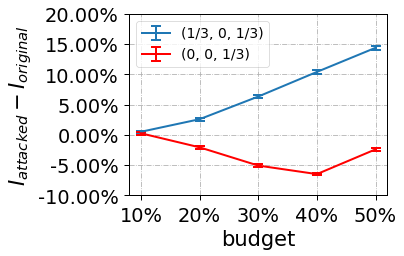

In [471]:
## Check if the normalized cut is really helpful in the long-run behavior

graph_type = 'Stoc-Block'
numExp = 30
Key = 'ratio targets'
mode = 'min_eigcent_SP'
GAMMA = 0.24
TAU = 0.06


################################################################################################
## alpha_3 \ne 0
with open('../result/unweighted/{}/{}-SIS-newcomm/Gamma-{:.2}---Tau-{:.2}/{}_numExp_{}_SIS_alpha2=0.p'.format(\
                                                mode, graph_type, GAMMA, TAU, graph_type, numExp), 'rb') as fid:
    data = pickle.load(fid)
data = data[~(data['ratio targets'].isin([0]) & data['ratio bystanders'].isin([0]))]
data = data.dropna()

S_err = []
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    S_err.append((a-b).sem() * 1.96)
    
################################################################################################
## control experiments ##

with open('../result/unweighted/{}/{}-SIS-newcomm/Gamma-{:.2}---Tau-{:.2}/{}_numExp_{}_SIS_alpha3=1.p'.format(\
                                                mode, graph_type, GAMMA, TAU, graph_type, numExp), 'rb') as fid:
    data_alpha3_zero = pickle.load(fid)
data_alpha3_zero = data_alpha3_zero[~(data_alpha3_zero['ratio targets'].isin([0]) & data_alpha3_zero['ratio bystanders'].isin([0]))]
data_alpha3_zero = data_alpha3_zero.dropna()
    
S_err_alpha3_zero = []
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data_alpha3_zero[data_alpha3_zero['graph'].isin(['attacked']) & data_alpha3_zero['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data_alpha3_zero[data_alpha3_zero['graph'].isin(['original']) & data_alpha3_zero['budget'].isin([budget])][Key]
    b.index = range(len(b))
    S_err_alpha3_zero.append((a-b).sem() * 1.96)
    
################################################################################################

S_attacked = data.pivot_table(index=['graph', 'budget'])[Key]['attacked']
S_original = data.pivot_table(index=['graph', 'budget'])[Key]['original']
S_diff  = S_attacked - S_original

S_attacked_control = data_alpha3_zero.pivot_table(index=['graph', 'budget'])[Key]['attacked']
S_original_control = data_alpha3_zero.pivot_table(index=['graph', 'budget'])[Key]['original']
S_diff_control = S_attacked_control - S_original_control


x = [0.1, 0.2, 0.3, 0.4, 0.5]
plt.errorbar(x, S_diff, yerr=S_err, label='(1/3, 0, 1/3)', linewidth=2, markersize=7, 
             capsize=5, elinewidth=2, markeredgewidth=2)
plt.errorbar(x, S_diff_control, yerr=S_err_alpha3_zero, label='(0, 0, 1/3)', linewidth=2, markersize=7, \
             capsize=5, elinewidth=2, markeredgewidth=2, color='r')
plt.xticks(x, ['10%', '20%', '30%', '40%', '50%'])
ax = plt.gca()
plt.yticks(ax.get_yticks(),  ['%.2f%%' % (i*100) for i in ax.get_yticks()])
plt.xlabel('budget')
plt.ylabel('$I_{attacked} - I_{original}$')
plt.legend(fontsize=14, loc='upper left')
plt.grid(linestyle='-.')
plt.tight_layout()
# plt.savefig('../result/6.pdf'.format(graph_type, graph_type, numExp))

In [275]:
### the statisticas about the largest eigenvlaues of BTER networks ###
import seaborn
n = 375
ret = []
for i in range(30):
    G = nx.read_edgelist('../data/BTER_{:02d}.txt'.format(i), nodetype=int)
    adj = nx.adjacency_matrix(G).todense()
    lambda1 = LIN.eig(adj)[0].max()
    ret.append(np.real(lambda1))
print(np.min(ret))
print(np.max(ret))

14.415055658217216
16.57809155392885


In [404]:
### the density of S/S' as the attacker's budget increases ###

graph_type = 'Email'
numExp = 1
mode = 'min_eigcent_SP'
folder = '../result/unweighted/{}'.format(mode)
Key = 'equalAlpha'
graph_name = ['original', 'attacked']

with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)

ret = []
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for gn in graph_name:
        for exp in range(numExp):
            G = data[budget][exp][gn]
            S = [i for i in range(G.order()) if G.nodes[i]['target']]
            G_S = G.subgraph(S)
            ret.append((nx.density(G_S), gn, budget))
ret = pd.DataFrame(ret, columns=['S-density', 'graph', 'budget'])
y = ret.groupby(['graph', 'budget']).mean()
print(y)

                 S-density
graph    budget           
attacked 0.1      0.923810
         0.2      0.971429
         0.3      0.990476
         0.4      0.990476
         0.5      0.990476
original 0.1      0.580952
         0.2      0.580952
         0.3      0.580952
         0.4      0.580952
         0.5      0.580952


In [407]:
### the largest eigenvalue of G as the attacker's budget increases ###

graph_type = 'Email'
numExp = 1
mode = 'min_eigcent_SP'
folder = '../result/unweighted/{}'.format(mode)
Key = 'equalAlpha'
graph_name = ['original', 'attacked']

with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)

ret = []
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for gn in graph_name:
        for exp in range(numExp):
            G = data[budget][exp][gn]
            adj = nx.adjacency_matrix(G).todense()
            lambda1 = np.real(LIN.eig(adj)[0].max())
            
            S = [i for i in range(G.order()) if G.nodes[i]['target']]
            G_S = G.subgraph(S)
            adj_S = nx.adjacency_matrix(G_S).todense()
            lambda1_S = np.real(LIN.eig(adj_S)[0].max())
            
            SP = [i for i in range(G.order()) if not G.nodes[i]['target']]
            G_SP = G.subgraph(SP)
            adj_SP = nx.adjacency_matrix(G_SP).todense()
            lambda1_SP = np.real(LIN.eig(adj_SP)[0].max())
            
            ret.append((lambda1, lambda1_S, lambda1_SP, gn, budget))
ret = pd.DataFrame(ret, columns=['lambda1', 'lambda1_S', 'lambda1_SP', 'graph', 'budget'])
y = ret.groupby(['graph', 'budget']).mean()
print(y)

                   lambda1  lambda1_S  lambda1_SP
graph    budget                                  
attacked 0.1     76.502251  13.141887   75.300028
         0.2     78.150761  13.641154   75.300028
         0.3     81.322018  13.874008   75.300028
         0.4     86.332350  13.874008   75.300028
         0.5     91.917971  13.874008   75.300028
original 0.1     76.266163   9.145657   75.300028
         0.2     76.266163   9.145657   75.300028
         0.3     76.266163   9.145657   75.300028
         0.4     76.266163   9.145657   75.300028
         0.5     76.266163   9.145657   75.300028


In [408]:
### the cut (non-normalized) size as the attacker's budget increases ###

graph_type = 'Email'
numExp = 1
mode = 'min_eigcent_SP'
folder = '../result/unweighted/{}'.format(mode)
Key = 'alpha3=1'
graph_name = ['original', 'attacked']

with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)

ret = []
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for gn in graph_name:
        for exp in range(numExp):
            G = data[budget][exp][gn]
            S = [i for i in range(G.order()) if G.nodes[i]['target']]
            ret.append((nx.cut_size(G, S), gn, budget))
ret = pd.DataFrame(ret, columns=['cut size', 'graph', 'budget'])
y = ret.groupby(['graph', 'budget']).mean()
print(y)

                 cut size
graph    budget          
attacked 0.1          419
         0.2          527
         0.3          761
         0.4            0
         0.5            0
original 0.1          419
         0.2          419
         0.3          419
         0.4          419
         0.5          419


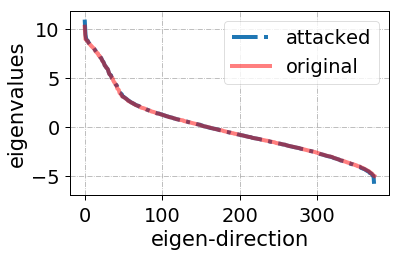

In [420]:
### the spectra before/after attack ###

graph_type = 'Small-World'
numExp = 30
mode = 'min_eigcent_SP'
folder = '../result/unweighted/{}'.format(mode)
Key = 'equalAlpha'
graph_name = ['original', 'attacked']
budget = 0.5
exp = 10

with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)
    
ret = {'attacked': None, 'original': None}
for key, _ in ret.items():
    G = data[budget][exp][key]
    adj = nx.adjacency_matrix(G).todense()
    eigVals = sorted(np.real(LIN.eig(adj)[0]), reverse=True)
    ret[key] = eigVals

x = range(len(G))
plt.plot(x, ret['attacked'], label='attacked', linestyle='-.', linewidth=4)
plt.plot(x, ret['original'], label='original', linewidth=4, alpha=0.5, color='r')
plt.legend()
plt.grid(linestyle='-.')
plt.ylabel('eigenvalues')
plt.xlabel('eigen-direction')
plt.tight_layout()

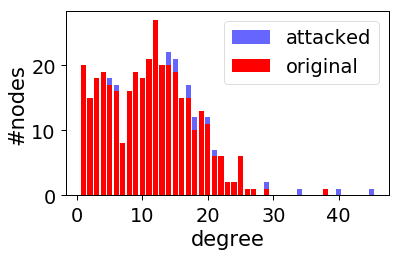

In [419]:
### the degree distributioin before/after attack ###
import collections

graph_type = 'BTER'
numExp = 30
mode = 'min_eigcent_SP'
folder = '../result/unweighted/{}'.format(mode)
Key = 'equalAlpha'
graph_name = ['attacked', 'original']
budget = 0.5
exp = 10

with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)
    
plt.figure()
deg_dist = {'attacked': None, 'original': None}
for gn in graph_name:
    G = data[budget][exp][gn]
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    deg_dist[gn] = np.array(cnt) / np.sum(cnt)
    if gn == 'attacked':
        plt.bar(deg, cnt, width=0.8, color='b', alpha=0.6, label='attacked')
    else:
        plt.bar(deg, cnt, width=0.8, color='r', label='original')
plt.legend()
plt.ylabel('#nodes')
plt.xlabel('degree')
plt.tight_layout()